In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df[ df.duplicated() ]

,TV,Radio,Newspaper,Sales


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


<Axes: xlabel='TV', ylabel='Sales'>

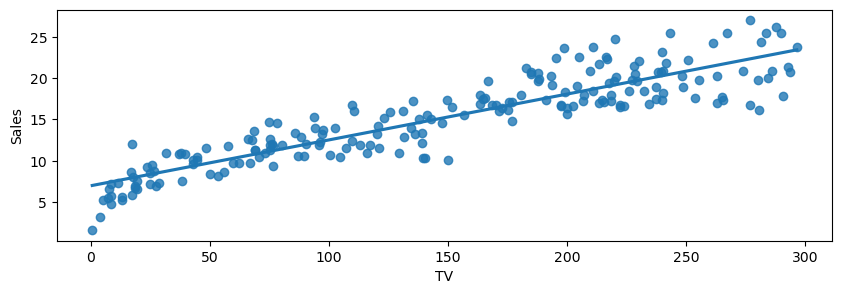

In [8]:
plt.figure(figsize=(10,3))
sns.regplot(x = 'TV', y = 'Sales', data = df, ci = 0)

<Axes: xlabel='Radio', ylabel='Sales'>

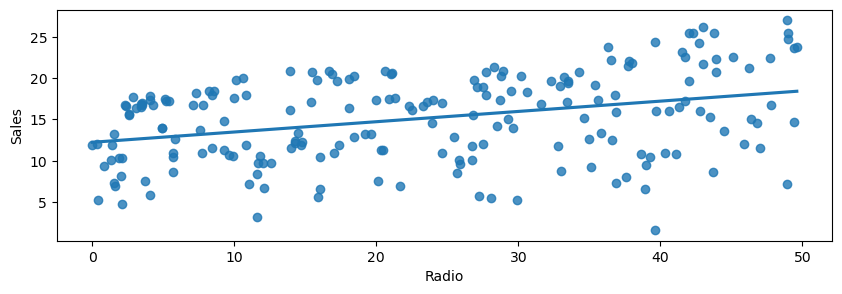

In [9]:
plt.figure(figsize=(10,3))
sns.regplot(x = 'Radio', y = 'Sales', data = df, ci = 0)

<Axes: xlabel='Newspaper', ylabel='Sales'>

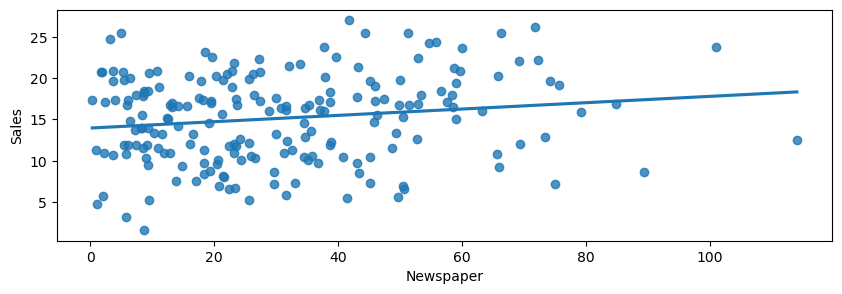

In [10]:
plt.figure(figsize=(10,3))
sns.regplot(x = 'Newspaper', y = 'Sales', data = df, ci = 0)

<Axes: >

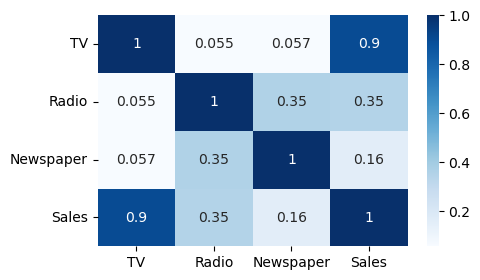

In [11]:
plt.figure(figsize=(5,3))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

<Axes: xlabel='TV'>

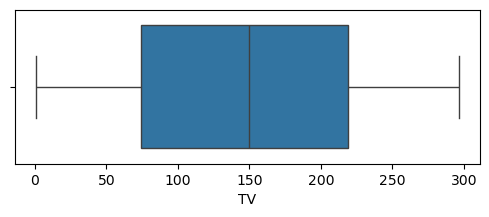

In [12]:
plt.figure(figsize=(6,2))
sns.boxplot(df['TV'], orient='h')

<Axes: xlabel='Radio'>

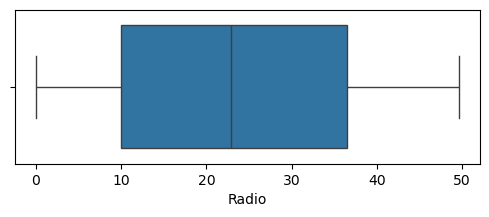

In [13]:
plt.figure(figsize=(6,2))
sns.boxplot(df['Radio'], orient='h')

<Axes: xlabel='Newspaper'>

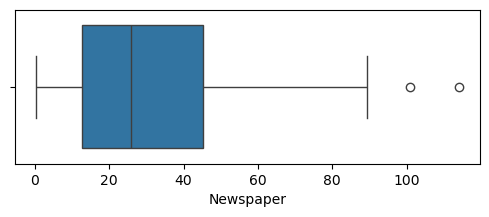

In [14]:
plt.figure(figsize=(6,2))
sns.boxplot(df['Newspaper'], orient='h')

In [15]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
IQR = q3 - q1
IQR

32.35

In [16]:
lwrRange = q1 - 1.5*IQR
lwrRange

-35.775000000000006

In [17]:
uprRange = q3 + 1.5*IQR
uprRange

93.625

In [18]:
df[(df['Newspaper'] < lwrRange) | (df['Newspaper'] > uprRange) ]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [19]:
df.at[16, 'Newspaper'] = 30.55
df.at[101, 'Newspaper'] = 30.55

<Axes: xlabel='Newspaper'>

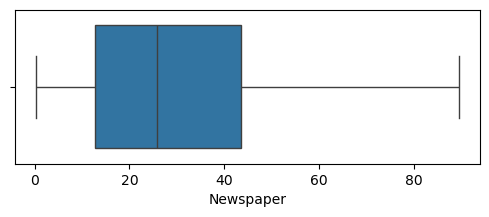

In [20]:
plt.figure(figsize=(6,2))
sns.boxplot(df['Newspaper'], orient='h')

In [21]:
X = df.drop(['Sales','Newspaper'], axis = 1)
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [22]:
y = df.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(160, 2)

In [25]:
X_test.shape

(40, 2)

In [26]:
X_train.head()

,TV,Radio
79,116.0,7.7
197,177.0,9.3
38,43.1,26.7
24,62.3,12.6
122,224.0,2.4


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.coef_

array([0.05450736, 0.10325764])

In [28]:
y_pred = model.predict(X_test)
y_pred

array([16.95537518, 20.36750946, 23.67877906,  9.23932462, 21.8589777 ,
       12.49890184, 21.14158798,  8.71453835, 17.26489488, 16.65891755,
        9.04850144,  8.44326393, 17.92443396,  8.17312478, 12.61199966,
       14.8739442 ,  8.09082502, 17.9679393 , 10.99191604, 20.57101437,
       20.63604288, 12.26621032, 11.0239442 , 22.2361825 ,  9.51268565,
        7.91404079, 20.86878181, 13.8814929 , 10.76286373,  8.05785124,
       15.9504224 , 10.68007267, 20.73382321, 10.22491484, 21.52687927,
       21.3167722 , 12.2771962 , 22.6941923 , 12.69753173,  6.45554633])

In [29]:
r2_score(y_test, y_pred)

0.9078797802624651